In [1]:
import pandas as pd
df = pd.read_excel('C:/Users/zhonggt1/Desktop/分类模型/data.xlsx')

,Selected Warranty Service Level,Problem Category,Machine Type,Abnormal LED Count,CPU Manufacture,CPU Type,DIMM Manufacture,DIMM Part Number,Disk Interface Type,Disk fwVersion,...,cpu_type,FPGA Version,Processor Cstatus,Processor Intel Virtualization Technology,Bootmode System Bootmode,Device Status,Choose Operating Mode,Replace Part,Language,Replace Part2
3606,24 hour csr,hdd/ssd error code/amber led,7d32,1.0,"[intel(r) corporation, intel(r) corporation]","[central processor, central processor]","[samsung, samsung, samsung, samsung, samsung, ...","[m393aag40m32-cae, m393aag40m32-cae, m393aag40...","[sas, sas, sata, sata, sata, sata, sata, sata,...","[cn32, cn32, xcv1lx42, xcv1lx42, xcv1lx42, xcv...",...,cooperlake/icelake,3.15,autonomous,enabled,legacy mode,tpm2.0 device present.,efficiency - favor performance,"drives and storage - ssd_asm,",english,"[drives , storage ]"
3705,same day response,memory disabled/missing,7x06,2.0,"[intel(r) corporation, intel(r) corporation]","[central processor, central processor]","[micron technology, micron technology, micron ...","[18asf2g72pdz-2g6b1, 18asf2g72pdz-2g6b1, 18asf...","[sas, sas, sas]","[f5a5, f5a5, f5a5]",...,skylake,4.08,autonomous,enable,uefi mode,"tpm1.2 device is enabled and activated, owners...",custom mode,"memory - memory,system boards - bdplanar,",japanese,[memory ]
3828,4 hour response,hdd/ssd defunct,5464,2.0,[intel(r) corporation],[central processor],"[samsung, hyundai electronics, hyundai electro...","[m393a1g40db0-cpb, hma41gr7mfr4n-tf, hma41gr7m...","[sas, sas, sas, sas, sas, sas, sas, sas]","[l5k8, l56r, l56r, l56r, l1kb, l56r, l56r]",...,skylake,2.07,disable,enable,uefi mode,"tpm1.2 device is enabled and activated, owners...",maximum performance,"hard drives,",german,"[hard drives,]"
4019,4 hour response,memory disabled/missing,7x21,1.0,"[intel(r) corporation, intel(r) corporation]","[central processor, central processor]","[samsung, samsung, samsung, samsung, samsung, ...","[m393a2k43bb1-ctd, m393a2k43bb1-ctd, m393a2k43...","[sata, sata, sas, sas, sas]","[mg35, mg35, tb52, l1b5, tb52]",...,skylake,6.03,disable,disable,uefi mode,"tpm1.2 device is enabled and activated, owners...",custom mode,"memory - memory,",english,[memory ]
4021,4 hour response,os/software error,7x21,2.0,"[intel(r) corporation, intel(r) corporation]","[central processor, central processor]","[samsung, samsung, samsung, samsung, samsung, ...","[m393a2k43bb1-ctd, m393a2k43bb1-ctd, m393a2k43...","[sata, sata, sas, sas, sas]","[mg35, mg35, tb52, l1b5, tb52]",...,skylake,6.03,disable,disable,uefi mode,"tpm1.2 device is enabled and activated, owners...",custom mode,"system boards - bdplanar,",english,[system boards ]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116273,4 hour response,hdd/ssd error code/amber led,7x10,1.0,[intel(r) corporation],[central processor],"[samsung, hyundai electronics, samsung, samsung]","[m393a2k40bb2-ctd, hma82gr7afr4n-vk, m393a2k43...","[sas, sas, sas, sas]","[null, l1b2, l1b2, l1b6]",...,skylake,3.01,disable,enable,uefi mode,"tpm1.2 device is enabled and activated, owners...",efficiency - favor performance,"drives and storage - hdd_asm,",english,"[drives , storage ]"
116342,4 hour response,boot error - not booting to os,7915,2.0,[intel(r) corporation],[central processor],"[samsung, samsung, hynix, samsung]","[m393b1k70qb0-yh9, m393b1k70qb0-yh9, hmt41gr7a...","[sas, sas, sas, sas, sas, sas, sas, sas]","[tb54, tb54, tb54, tb54, tb54, tb54, tb54, tb54]",...,skylake,3.04,autonomous,enable,uefi and legacy,"tpm1.2 device is enabled and activated, owners...",efficiency - favor performance,"system boards - bdplanar,",english,[system boards ]
116343,4 hour response,hdd/ssd defunct,7x08,1.0,"[intel(r) corporation, intel(r) corporation]","[central processor, central processor]","[samsung, samsung]","[m393a4k40db2-ctd, m393a4k40db2-ctd]","[sas, sas, sas, sas, sas, sas, sas, sas]","[tb54, tb54, tb54, tb54, tb54, tb54, tb54, tb54]",...,skyl

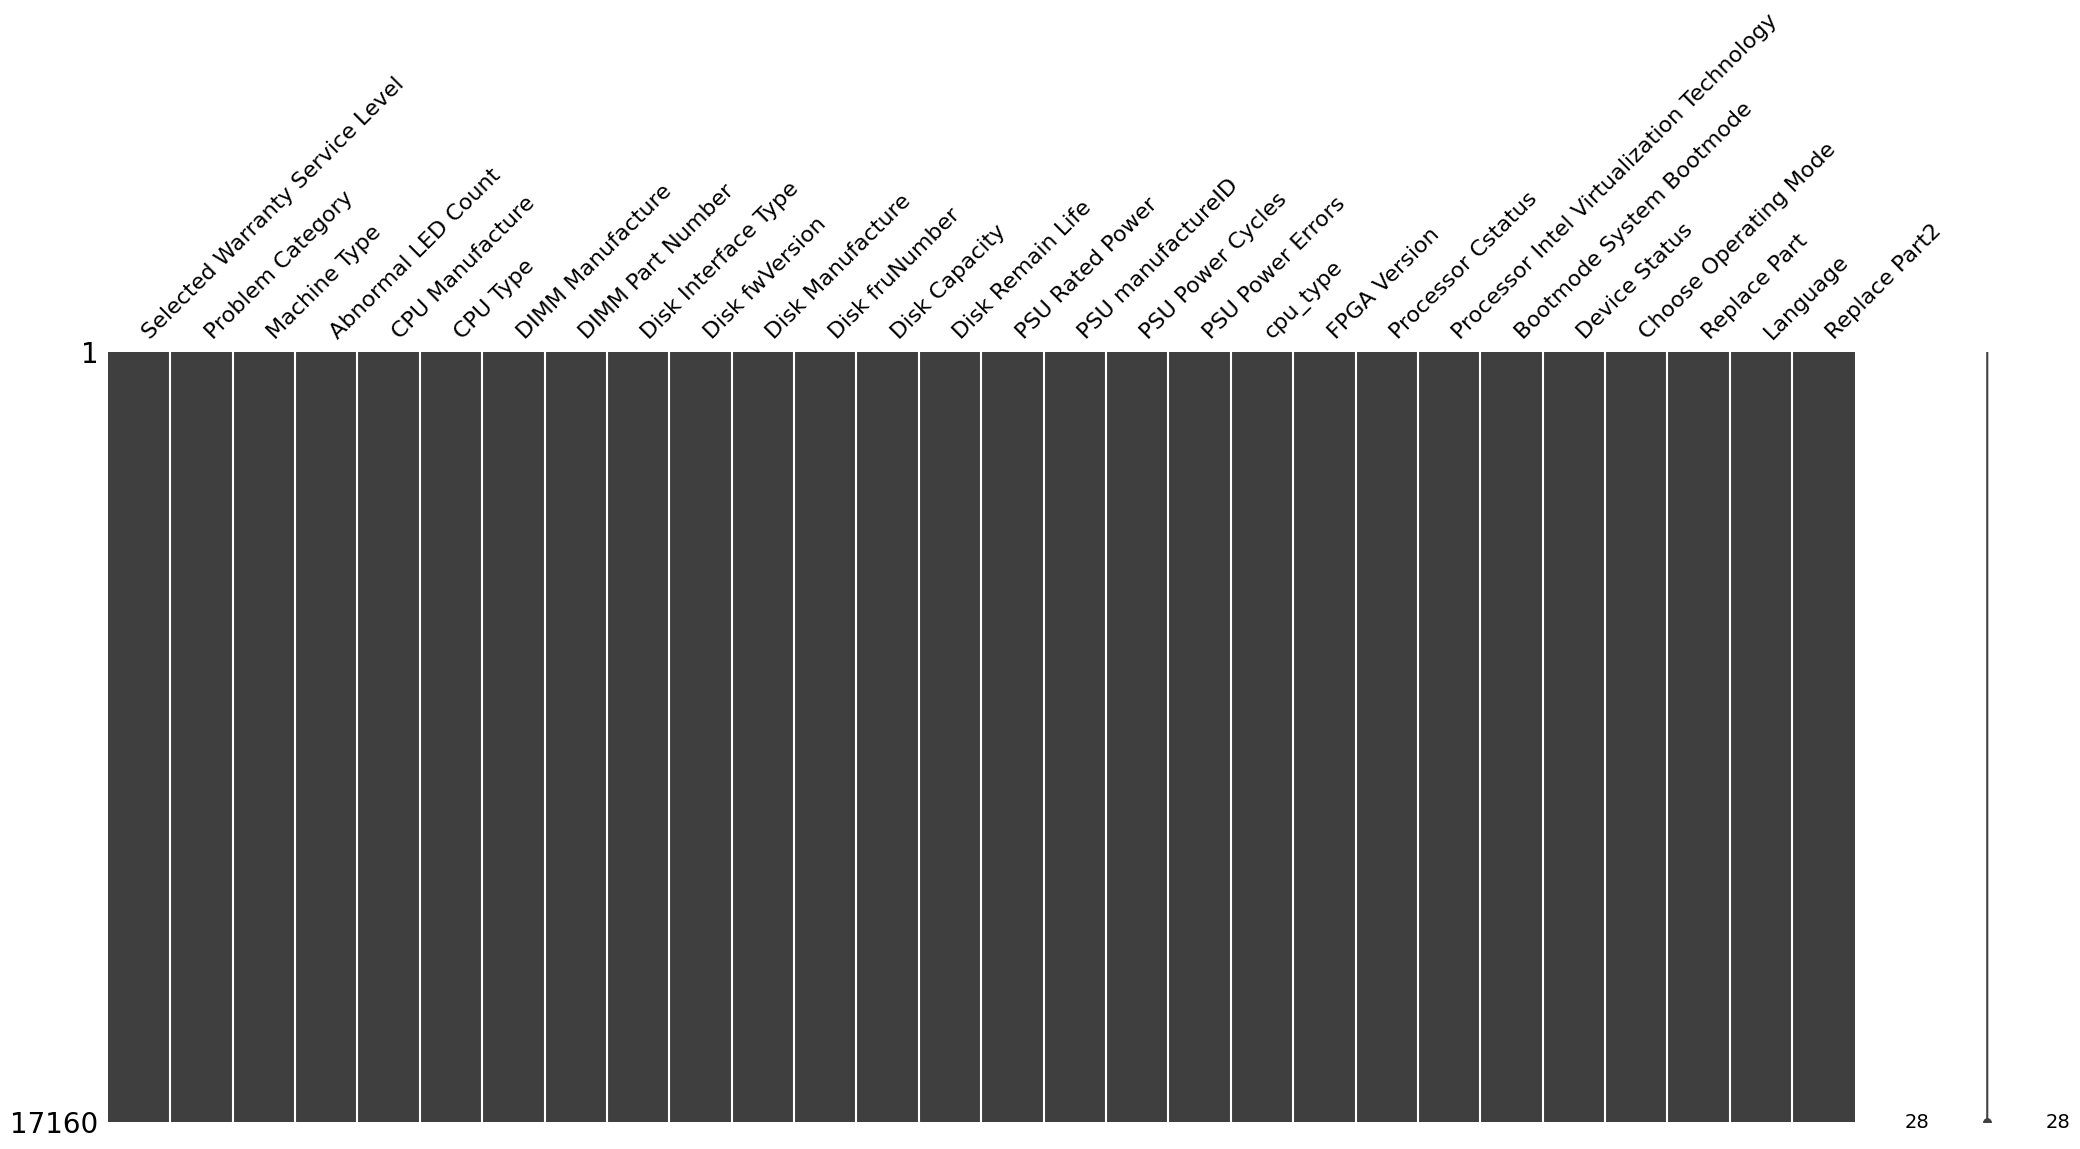

In [2]:

remove_col = ['Work Order Count', 'Onsite Work Order  Count', 'Onsite appear befor than others', 'file_type_id', 
              'matched_serial_num_from_file_data', 'Status', 'log_id_count_from_file_data', 'log_id_list_from_file_data',
              'Case Num', 'Country', 'Log ID from Case Info', 'Report ID', 'Serial Number', 'Created On', 'Closed On', 'DIMM Manuf_date', 
              'Serial Num', 'Operating System', "Action Plan", "Problem Description", "UEFI Version", "XCC Version", 'Replace Part Name',"PSU on Duration","Disk partNumber"]

df = df.drop(remove_col,axis=1)

na_col = ['DIMM Capacity', 'DIMM Error Status', 'Mother Board Location', 'Others Location', 'PCI Location', 'Memory Dimmxdisable Control',
          'CPU Event','DIMM Health Event', 'psu Location', 'CPU Location', 'PSU Status', 'Dimm Location', 'UEFI Version Changing',
          'Disk Location', 'CPU Status', 'Hidden Log', 'DIMM Status', 'Fan Location', 'Disk Health Status', 'RAID Log  Message', 
          'RAID Log  severity', 'RAID Log ID', 'RAID Log Timestamp', 'LXPM  Version Changing', 'Abnormal LED Name', 'XCC Version Changing',
          'Restart Count', 'Active Event and Message', 'Restart Time and Causes','LXPM Version', 'DIMM Ecc Bits', 'System Power', 'Post Completed',
          'hw_changing', 'Disk Temperature', 'Latest 30 Days Error Lists', 'Latest 30 Days Warning Lists', 'Latest 30 Days Info Lists','Secure Boot Mode']
df = df.drop(na_col, axis=1)
import missingno as msno
df_new = df[df["Replace Part"].notna()]
df_new = df_new[df_new["Machine Type"].notna()]
df_new = df_new[df_new["PSU Rated Power"].notna()]

df_new = df_new.fillna(method='backfill')

df_new[['CPU Manufacture', 'CPU Type', 'DIMM Manufacture', 'DIMM Part Number', 'Disk Interface Type', 'Disk fwVersion', 'Disk fruNumber', 'Disk Remain Life',
       'PSU manufactureID', 'PSU Power Cycles', 'PSU Power Errors', 'PSU Rated Power' ,'Disk Manufacture', 'Disk Capacity']] = df_new[['CPU Manufacture', 'CPU Type', 'DIMM Manufacture', 'DIMM Part Number', 'Disk Interface Type', 'Disk fwVersion', 'Disk fruNumber', 'Disk Remain Life',
       'PSU manufactureID', 'PSU Power Cycles', 'PSU Power Errors', 'PSU Rated Power', 'Disk Manufacture', 'Disk Capacity']].applymap(lambda x: x.split("|"))

       
df_new['Replace Part2'] = df_new['Replace Part'].str.split(r'\||AND')

df_new['Replace Part2'] = df_new['Replace Part2'].apply(lambda x: tuple(i.split('-')[0] for i in x))

df_new['Abnormal LED Count'] = df_new['Abnormal LED Count'].astype('string')
df_new['FPGA Version'] = df_new['FPGA Version'].astype('string')
df_new['Machine Type'] = df_new['Machine Type'].astype('string')
for column in df_new:
    df_new[column] = [sample[:-1] if sample[-1] == '' else sample for sample in df_new[column]]



df_lower = df_new.applymap(lambda x: [element.lower() if isinstance(element, str) else element for element in x] if isinstance(x, (list, tuple)) else x.lower() if isinstance(x, str) else x)

msno.matrix(df_lower)


In [3]:
import numpy as np
Y = df_lower['Replace Part2'].apply(lambda x: tuple(i.strip(', ') for i in x))

df = pd.DataFrame({'list_column':  Y.unique()})
df = df.explode('list_column').reset_index(drop=True)
unique_items = df['list_column'].unique()

list(unique_items)

cat = list(np.unique([x for x in list(unique_items)if x not in [", null", "null, "]]))
new_list = [item.replace("Reusable items (Reusable Tapes, Mylar,Sponge,thermal pad, rubber, rubber feet)", "Reusable items") for item in cat]
new_list = [x for item in new_list for x in item.split(',') if x.strip() != "null"]
new_list = [item for item in new_list if "NULL" not in item]
final_cat = list(np.unique([x for x in list(new_list)]))

In [4]:
columns_to_encode = ['Selected Warranty Service Level', 'Problem Category', 'Machine Type',
       'Abnormal LED Count',
       'FPGA Version', 'Processor Cstatus',
       'Processor Intel Virtualization Technology', 'Bootmode System Bootmode', 'Choose Operating Mode', 'cpu_type', 'Language']
columns_to_multilabel_encode =['CPU Type', 'DIMM Manufacture', 'DIMM Part Number', 'Disk Interface Type', 'Disk fwVersion', 'Disk fruNumber', 
'Disk Remain Life', 'PSU manufactureID', 'PSU Power Cycles', 'PSU Power Errors', 'PSU Rated Power', 'Disk Manufacture', 'Disk Capacity','CPU Manufacture']

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

df_encoded = pd.DataFrame()

for col in columns_to_encode:
    labels = list(df_lower[col].unique())
    vectorizer = CountVectorizer()
    encoded = vectorizer.fit_transform(labels)
    encoded_actual = vectorizer.transform(df_lower[col])
    col_new = vectorizer.get_feature_names_out()
    encoded = np.where(encoded.toarray() > 1, 1, encoded.toarray())
    
    encoded_df = pd.DataFrame(encoded_actual.toarray(), columns=[f"{col}_{new_col}" for new_col in col_new])
    df_encoded = pd.concat([df_encoded, encoded_df], axis=1)



In [6]:
Device_Charactor = ['TPM1.2 Device is Enabled and Activated', 'ownership is not installed',
'TPM2.0 Device', 'TPM2.0 Device is enabled','Hardware Physical Presence is Deasserted', 'Hardware Physical Presence is Asserted',
'TPM1.2 Device is Disabled and Deactivated', 'TPM1.2 Device is Disabled but Activated']
Device_Character = [doc.lower() for doc in Device_Charactor ]

vectorizer = CountVectorizer()
Device_Status_encoded = vectorizer.fit_transform(Device_Character)
Device_Status = vectorizer.transform(df_lower['Device Status'])
Device_Status = np.where(Device_Status.toarray() > 1, 1, Device_Status.toarray())
label_names = vectorizer.get_feature_names_out()
Device_Status_col = pd.DataFrame(Device_Status, columns=['Device Status' + '_'+ label_names])



In [19]:
from sklearn.preprocessing import MultiLabelBinarizer
columns_to_multilabel_encode =['CPU Type', 'DIMM Manufacture', 'DIMM Part Number', 'Disk Interface Type', 'Disk fwVersion', 'Disk fruNumber', 
'Disk Remain Life', 'PSU manufactureID', 'PSU Power Cycles', 'PSU Power Errors', 'PSU Rated Power', 'Disk Manufacture', 'Disk Capacity','CPU Manufacture']



df_new3 = pd.DataFrame(index=df_lower.index) 

for col in columns_to_multilabel_encode:
    mlb = MultiLabelBinarizer()
    transformed_data = mlb.fit_transform(df_lower[col])
    column_names = [col + '_' + str(cls) for cls in mlb.classes_]
    df_temp = pd.DataFrame(transformed_data, columns=column_names, index=df_lower.index)
    df_new3 = pd.concat([df_new3, df_temp], axis=1)

df_new3.reset_index(drop=True, inplace=True)  
X_processed = pd.concat([df_encoded,df_new3], axis=1)
X_processed.columns = X_processed.columns.astype(str)
X_processed

,Selected Warranty Service Level_12,Selected Warranty Service Level_24,Selected Warranty Service Level_48,Selected Warranty Service Level_72,Selected Warranty Service Level_96,Selected Warranty Service Level_business,Selected Warranty Service Level_csr,Selected Warranty Service Level_day,Selected Warranty Service Level_hour,Selected Warranty Service Level_next,...,Disk Capacity_960.1971gb,Disk Capacity_960gb,Disk Capacity_9872.0156gb,Disk Capacity_9895.6046gb,Disk Capacity_999.9976gb,"CPU Manufacture_advanced micro devices, inc.",CPU Manufacture_intel(r) corporation,CPU Manufacture_intel(r) corporationrecommenda,CPU Manufacture_unknown,CPU Manufacture_unknownd micro devices inc.
0,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17155,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
17156,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
17157,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
17158,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [8]:
labels2 = final_cat
labels2= list(np.unique(labels2))
vectorizer = CountVectorizer()
encoded = vectorizer.fit_transform(labels2)
encoded_actual = vectorizer.transform(df_lower["Replace Part"])
col_new = vectorizer.get_feature_names_out()
encoded_actual = np.where(encoded_actual.toarray() > 1, 1, encoded_actual.toarray())
Y_processed = pd.DataFrame(encoded_actual, columns=['Replace Part' + '_'+ col_new])

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_processed,np.array(Y_processed),test_size=0.3,random_state=0)

In [24]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_classifier = RandomForestClassifier(n_estimators=140,
                             random_state=0 
                            )

multi_label_classifier = MultiOutputClassifier(rf_classifier)

multi_label_classifier.fit(X_train, y_train)


y_pred = multi_label_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.683954933954934
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.80      0.44      0.57       665
           2       0.94      0.89      0.91      2717
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        37
           5       1.00      0.05      0.10        56
           6       0.82      0.43      0.56       806
           7       0.00      0.00      0.00        62
           8       0.00      0.00      0.00        27
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00        28
          11       0.00      0.00      0.00        24
          12       0.50      0.03      0.05        38
          13       1.00      0.05      0.10        56
          14       0.93      0.69      0.79       453
          15       0.00      0.00      0.00         1
          16       0.95      0

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.


# SHAP Importance

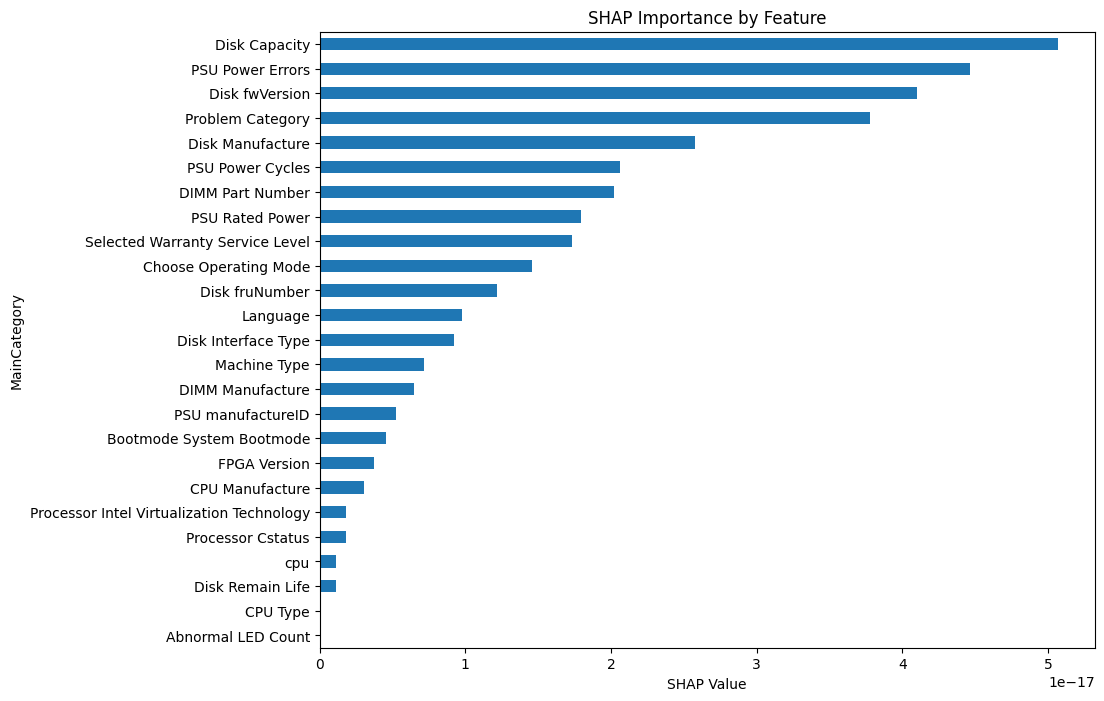

In [25]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(multi_label_classifier.estimators_[0])

shap_values = explainer.shap_values(X_test)

shap_values_sum = np.sum(shap_values, axis=0)

shap_sum = np.abs(shap_values_sum).mean(axis=0)

shap_df = pd.DataFrame(shap_sum, index=X_test.columns, columns=["SHAP"])

shap_df['MainCategory'] = shap_df.index.to_series().apply(lambda x: x.split('_')[0])

grouped_shap_df = shap_df.groupby('MainCategory')['SHAP'].sum().sort_values()

# Create a bar plot for the SHAP values
grouped_shap_df.plot(kind='barh', legend=False, figsize=(10, 8))
plt.xlabel('SHAP Value')
plt.title('SHAP Importance by Feature')
plt.show()


 # Feature Selection

In [26]:
import numpy as np
feature_importances = np.zeros(X_train.shape[1])
for estimator in multi_label_classifier.estimators_:
    feature_importances += estimator.feature_importances_
feature_importances /= len(multi_label_classifier.estimators_)

In [27]:
feature_importance_dict = dict(zip(X_train.columns, feature_importances))
import pandas as pd
feature_importance_df = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature', 'Importance'])
feature_importance_df['MainCategory'] = feature_importance_df['Feature'].apply(lambda x: x.split('_')[0])
grouped_importance = feature_importance_df.groupby('MainCategory')['Importance'].sum().reset_index()
grouped_importance = grouped_importance.sort_values(by='Importance', ascending=False)

print(grouped_importance)


                                 MainCategory  Importance
20                           Problem Category    0.187048
17                           PSU Power Errors    0.140529
16                           PSU Power Cycles    0.113959
12                             Disk fwVersion    0.078397
11                             Disk fruNumber    0.072793
6                            DIMM Part Number    0.066072
7                               Disk Capacity    0.048900
15                               Machine Type    0.030375
9                            Disk Manufacture    0.026477
23            Selected Warranty Service Level    0.024156
4                       Choose Operating Mode    0.022059
5                            DIMM Manufacture    0.021043
14                                   Language    0.020264
18                            PSU Rated Power    0.019745
13                               FPGA Version    0.018005
19                          PSU manufactureID    0.017462
24            

In [37]:
# Set a threshold for feature importance
threshold = 0.03
important_categories = grouped_importance[grouped_importance['Importance'] > threshold]['MainCategory'].tolist()
important_feature_names = [col for col in X_train.columns if col.split('_')[0] in important_categories]
X_train_important = X_train[important_feature_names]
X_test_important = X_test[important_feature_names]



In [38]:
multi_label_classifier.fit(X_train_important, y_train)


y_pred2 = multi_label_classifier.predict(X_test_important)

accuracy2 = accuracy_score(y_test, y_pred2)
report2 = classification_report(y_test, y_pred2)

print("Accuracy:", accuracy2)
print("Classification Report:")
print(report2)

Accuracy: 0.6925019425019425
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.77      0.44      0.56       665
           2       0.93      0.88      0.91      2717
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        37
           5       0.89      0.14      0.25        56
           6       0.77      0.48      0.59       806
           7       0.00      0.00      0.00        62
           8       0.00      0.00      0.00        27
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00        28
          11       0.00      0.00      0.00        24
          12       0.67      0.05      0.10        38
          13       0.89      0.14      0.25        56
          14       0.93      0.69      0.79       453
          15       0.00      0.00      0.00         1
          16       0.95      

C:\Users\zhonggt1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zhonggt1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zhonggt1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:134

In [39]:
# Convert y_train into a DataFrame (assuming it's not already)
y_train_df = pd.DataFrame(y_train)

# For each output (column), print the distribution of classes
for col in y_train_df.columns:
    print(y_train_df[col].value_counts(normalize=True))


0
0    0.999917
1    0.000083
Name: proportion, dtype: float64
1
0    0.863137
1    0.136863
Name: proportion, dtype: float64
2
1    0.508991
0    0.491009
Name: proportion, dtype: float64
3
0    1.0
Name: proportion, dtype: float64
4
0    0.993506
1    0.006494
Name: proportion, dtype: float64
5
0    0.991508
1    0.008492
Name: proportion, dtype: float64
6
0    0.838994
1    0.161006
Name: proportion, dtype: float64
7
0    0.985847
1    0.014153
Name: proportion, dtype: float64
8
0    0.995255
1    0.004745
Name: proportion, dtype: float64
9
0    0.998002
1    0.001998
Name: proportion, dtype: float64
10
0    0.995421
1    0.004579
Name: proportion, dtype: float64
11
0    0.995338
1    0.004662
Name: proportion, dtype: float64
12
0    0.992091
1    0.007909
Name: proportion, dtype: float64
13
0    0.991508
1    0.008492
Name: proportion, dtype: float64
14
0    0.92008
1    0.07992
Name: proportion, dtype: float64
15
0    0.999917
1    0.000083
Name: proportion, dtype: float64
16
0   

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Define the parameter grid
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Initialize MultiOutputClassifier
multi_label_rf = MultiOutputClassifier(rf)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=multi_label_rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_important, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters: ", best_params)

# Train and predict using the model with the best parameters
best_rf = grid_search.best_estimator_
y_pred_grid = best_rf.predict(X_test_important)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

# Define the base KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Define the multi-label classifier
multi_label_classifier = MultiOutputClassifier(knn_classifier)

# Fit the model
multi_label_classifier.fit(X_train_important, y_train)

# Make predictions
y_pred_knn = multi_label_classifier.predict(X_test_important)
accuracy_knn= accuracy_score(y_test, y_pred_knn)

# Print classification report
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_knn)


MemoryError: Unable to allocate 798. MiB for an array with shape (12012, 8705) and data type int64